#Data Exploration

In [7]:
import pandas as pd
import numpy as np
from ast import literal_eval
import string

names=['index','account'	,'profile_name'	,'id'	,'following'	,'likes',	'posts_count'	,'followers'	,'is_verified',	'datetime',	'url',	'comments',	'video_view_count',	'video_url',	'timestamp'	,'adultScore',	'racyScore',	'goreScore'	,'isBWImg',	'clipArtType',	'lineDrawingType'	,'tokens']
data=pd.read_csv("test_postprocessed_data.txt",delimiter=",", names=names, header=0)
print(data.head())

   index                account            profile_name                   id  \
0      0   moonlight.homebakery   Moonlight home bakery  2604477449452159164   
1      1   moonlight.homebakery   Moonlight home bakery  2676982748423831998   
2      2   moonlight.homebakery   Moonlight home bakery  2624004213020042158   
3      3   moonlight.homebakery   Moonlight home bakery  2604482556512284410   
4      4   moonlight.homebakery   Moonlight home bakery  2604481372804106171   

   following  likes  posts_count  followers  is_verified    datetime  ...  \
0         17      4            6         25          NaN  1624697928  ...   
1         17     17            6         25          NaN  1633341233  ...   
2         17      8            6         25          NaN  1627025699  ...   
3         17      5            6         25          NaN  1624698536  ...   
4         17      5            6         25          NaN  1624698395  ...   

  video_view_count  video_url                 timestamp 

In [8]:
data['account_insta_model']=data['account']+" "+data['profile_name']
data1=data[['account', 'profile_name']]
data2=data1.apply(lambda x: ','.join(x.astype(str)), axis=1)
data_clean=pd.DataFrame({'clean':data2})
sent = [row.split(',') for row in data_clean['clean']]
sent

[[' moonlight.homebakery', ' Moonlight home bakery'],
 ['moonlight.homebakery', 'Moonlight home bakery'],
 ['moonlight.homebakery', 'Moonlight home bakery'],
 ['moonlight.homebakery', 'Moonlight home bakery'],
 ['moonlight.homebakery', 'Moonlight home bakery'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcompany', 'Faye Audley Lash & Brow Artist'],
 ['cheshirelashcom

In [9]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


#Word2Vec

In [6]:
from gensim.models import Word2Vec
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)
model.similarity('Faye Audley Lash & Brow Artist', 'SpaceX')

TypeError: __init__() got an unexpected keyword argument 'size'

In [90]:
model.most_similar("SpaceX")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Moonlight home bakery', 0.0923827514052391),
 (' moonlight.homebakery', 0.07553382217884064),
 ('Faye Audley Lash & Brow Artist', 0.03449662774801254),
 ('spacex', -0.007105337921530008),
 (' Moonlight home bakery', -0.09882418066263199),
 ('cheshirelashcompany', -0.10883741080760956),
 ('moonlight.homebakery', -0.15446148812770844)]

#Clustering with KMeans

In [91]:
from nltk.cluster import KMeansClusterer
import nltk
from sklearn import cluster
from sklearn import metrics

X=model[model.wv.vocab]

NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

  
words=list(model.wv.vocab)
for i, word in enumerate(words):
  print(word +': '+str(assigned_clusters[i]))

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)
 

 moonlight.homebakery: 0
 Moonlight home bakery: 2
moonlight.homebakery: 1
Moonlight home bakery: 0
cheshirelashcompany: 2
Faye Audley Lash & Brow Artist: 1
spacex: 1
SpaceX: 0
Cluster id labels for inputted data
[1 0 1 2 0 0 0 2]
Centroids data
[[-0.00333779  0.00748599 -0.00079146  0.00307191  0.000719    0.00194122
  -0.00123606 -0.00328532  0.00237822 -0.0007512  -0.00690158 -0.00046017
   0.00032009  0.00154203  0.00032336  0.00382289 -0.00271499  0.00313114
   0.00003827  0.00156143  0.00324061  0.00250247 -0.00166481  0.00493997
   0.00147148  0.00074297  0.00212903  0.00020447  0.00107909  0.00390651
  -0.00148158  0.00196387  0.0038042   0.0020859   0.00268483 -0.0017089
   0.00440639  0.00411269  0.00147396  0.00018006 -0.00518886  0.0036373
  -0.00297928  0.00569956  0.00060801 -0.00564181 -0.00177006 -0.00107778
   0.00140379  0.0018045 ]
 [ 0.00676701  0.00380002 -0.00011231 -0.00111654 -0.00447375 -0.00516012
   0.00616053  0.00067988  0.00472305  0.00268475  0.00698084 -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


#Clustering with TSNE

In [10]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model_tsne = TSNE(random_state=0)
np.set_printoptions(suppress=True)
 
Y=model_tsne.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
print(Y)
 
for j in range(0,len(sent)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print("%s %s" % (assigned_clusters[j],  sent[j]))
 
plt.show()

NameError: name 'X' is not defined

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


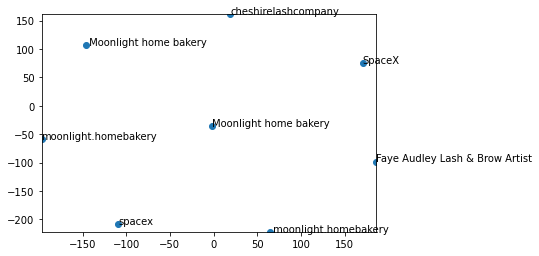

In [83]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
            plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

display_closestwords_tsnescatterplot(model, 'spacex', 50) 


#..with Tags

In [109]:
#Here,I would like to include also the tags in order to improve calculation of similarities

new_data=pd.DataFrame({'account':data['account'],
                       'profile_name':data['profile_name'],
                       'tags':data['tokens']})
new_data.head(10)


,account,profile_name,tags
0,moonlight.homebakery,Moonlight home bakery,"['White', 'Brown', 'food', 'indoor', 'chocolat..."
1,moonlight.homebakery,Moonlight home bakery,"['White', 'Brown', 'dessert', 'food', 'baked g..."
2,moonlight.homebakery,Moonlight home bakery,"['White', 'birthday cake', 'dessert', 'baked g..."
3,moonlight.homebakery,Moonlight home bakery,"['Brown', 'White', 'Grey', 'dessert', 'baked g..."
4,moonlight.homebakery,Moonlight home bakery,"['Yellow', 'fast food', 'baked goods', 'indoor..."
5,cheshirelashcompany,Faye Audley Lash & Brow Artist,"['Pink', 'eyelash', 'closeup', 'organ', 'masca..."
6,cheshirelashcompany,Faye Audley Lash & Brow Artist,"['Pink', 'closeup', 'skin', 'eyelash', 'organ'..."
7,cheshirelashcompany,Faye Audley Lash & Brow Artist,"['Grey', 'White', 'human face', 'black and whi..."
8,cheshirelashcompany,Faye Audley Lash & Brow Artist,"['Brown', 'eyes', 'closeup', 'eyelash', 'organ..."
9,cheshirelashcompany,Faye Audley Lash & Brow Artist,"['Brown', 'Pink', 'closeup', 'eyelash', 'organ..."


In [124]:
'''
def clean_list(list_):
  list_ = list_.replace('"[', '')
  list_ = list_.replace(']"', '')
  return list_
'''
new_data
new_data1=new_data[['account', 'profile_name', 'tags']]
new_data2=new_data1.apply(lambda x: ','.join(x.astype(str)), axis=1)
new_data_clean=pd.DataFrame({'clean':new_data2})
new_sent = [row.split(',') for row in new_data_clean['clean']]
new_sent

[[' moonlight.homebakery',
  ' Moonlight home bakery',
  "['White'",
  " 'Brown'",
  " 'food'",
  " 'indoor'",
  " 'chocolate'",
  " 'indoor'",
  " 'plastic'",
  " 'pan'",
  " 'a'",
  " 'container'",
  " 'of'",
  " 'brown'",
  " 'liquid'",
  " 'Food']"],
 ['moonlight.homebakery',
  'Moonlight home bakery',
  "['White'",
  " 'Brown'",
  " 'dessert'",
  " 'food'",
  " 'baked goods'",
  " 'cake'",
  " 'cocoa solids'",
  " 'chocolate'",
  " 'cake'",
  " 'chocolate'",
  " 'table'",
  " 'piece'",
  " 'indoor'",
  " 'slice'",
  " 'dessert'",
  " 'eaten'",
  " 'sliced'",
  " 'a'",
  " 'container'",
  " 'of'",
  " 'food']"],
 ['moonlight.homebakery',
  'Moonlight home bakery',
  "['White'",
  " 'birthday cake'",
  " 'dessert'",
  " 'baked goods'",
  " 'cake'",
  " 'sweetness'",
  " 'indoor'",
  " 'baking'",
  " 'pastry'",
  " 'snack'",
  " 'cake decorating'",
  " 'icing'",
  " 'sugar cake'",
  " 'strawberry'",
  " 'kuchen'",
  " 'fruit'",
  " 'buttercream'",
  " 'torte'",
  " 'birthday'",
  " '